In [ ]:
!pip install matplotlib

In [ ]:
!pip install textblob
from textblob import TextBlob

In [ ]:
import pandas
import glob

In [ ]:
file_pattern = "*.csv"
file_list = glob.glob(file_pattern)
dataframes = []
file_list.sort()
for file_name in file_list:
  df = pandas.read_csv(file_name)
  dataframes.append(df)

In [ ]:
def polarity_only(review):
  analysis = TextBlob(review)
  score = analysis.sentiment.polarity
  return score

In [ ]:
for i in range(len(dataframes)):
  print(dataframes[i].shape)

(222, 13)
(204, 13)
(219, 13)
(200, 13)
(495, 13)
(1152, 13)
(705, 13)
(1000, 13)
(1221, 13)
(247, 13)
(246, 13)


In [ ]:
for i in range(len(dataframes)):
  dataframes[i] = dataframes[i].dropna(subset=['Content'])
  dataframes[i].drop(dataframes[i][dataframes[i]['Likes'] > 0].index, inplace=True)
  print(dataframes[i].shape)

(101, 13)
(93, 13)
(72, 13)
(66, 13)
(215, 13)
(573, 13)
(396, 13)
(500, 13)
(590, 13)
(95, 13)
(109, 13)


<ipython-input-6-c9c65fc3cdf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i].drop(dataframes[i][dataframes[i]['Likes'] > 0].index, inplace=True)


In [ ]:
for i in range(len(dataframes)):
  dataframes[i]['score_only'] = dataframes[i]['Content'].apply(lambda x: polarity_only(x))
  print(dataframes[i].shape)

(101, 14)
(93, 14)
(72, 14)
(66, 14)
(215, 14)
(573, 14)
(396, 14)
(500, 14)
(590, 14)
(95, 14)
(109, 14)


<ipython-input-7-237695e076a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i]['score_only'] = dataframes[i]['Content'].apply(lambda x: polarity_only(x))


In [ ]:
values = []

In [ ]:
for i in range(len(dataframes)):
  print(dataframes[i]['score_only'].mean())
  values.append(dataframes[i]['score_only'].mean())

0.07315337843308141
0.05815442248909992
0.09681292087542087
0.03085056462897372
0.08730932488054581
0.07167435830226697
0.07315953642721883
0.045478683381433384
0.050334536905354235
0.06962200153647523
0.04251975373254581


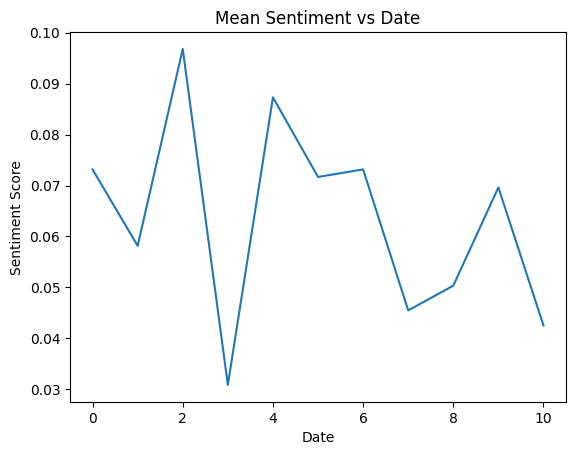

In [ ]:
import matplotlib.pyplot as plt

plt.plot(values)
plt.title("Mean Sentiment vs Date")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.plotting import lag_plot
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean

from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
import  statsmodels.tsa.stattools as sts

import statsmodels.tsa.api as smt

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yfin
yfin.pdr_override()



data = pdr.get_data_yahoo("^NSEI", start="2022-11-1", end="2023-09-01")
data.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,18130.699219,18175.800781,18060.150391,18145.400391,18145.400391,349900
2022-11-02,18177.900391,18178.750000,18048.650391,18082.849609,18082.849609,270900
2022-11-03,17968.349609,18106.300781,17959.199219,18052.699219,18052.699219,213000
2022-11-04,18053.400391,18135.099609,18017.150391,18117.150391,18117.150391,267900
2022-11-07,18211.750000,18255.500000,18064.750000,18202.800781,18202.800781,314800


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-25,19297.400391,19339.550781,19229.699219,19265.800781,19265.800781,466500
2023-08-28,19298.349609,19366.849609,19249.699219,19306.050781,19306.050781,248200
2023-08-29,19374.849609,19377.900391,19309.099609,19342.650391,19342.650391,307400
2023-08-30,19433.449219,19452.800781,19334.750000,19347.449219,19347.449219,233000
2023-08-31,19375.550781,19388.199219,19223.650391,19253.800781,19253.800781,562600


In [ ]:


train_data, test_data = data[0:-73], data[-73:]
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

In [ ]:
returns.head()

,Log Return Rate
Date,
2022-11-02,0.002600
2022-11-03,-0.011595
2022-11-04,0.004722
2022-11-07,0.008733
2022-11-09,0.004192


In [ ]:
returns.tail()

,Log Return Rate
Date,
2023-05-12,-0.004589
2023-05-15,0.003581
2023-05-16,0.005061
2023-05-17,-0.007182
2023-05-18,-0.000708


C:\Users\ayush\AppData\Local\Temp\ipykernel_16488\844613912.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])
C:\Users\ayush\AppData\Local\Temp\ipykernel_16488\844613912.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


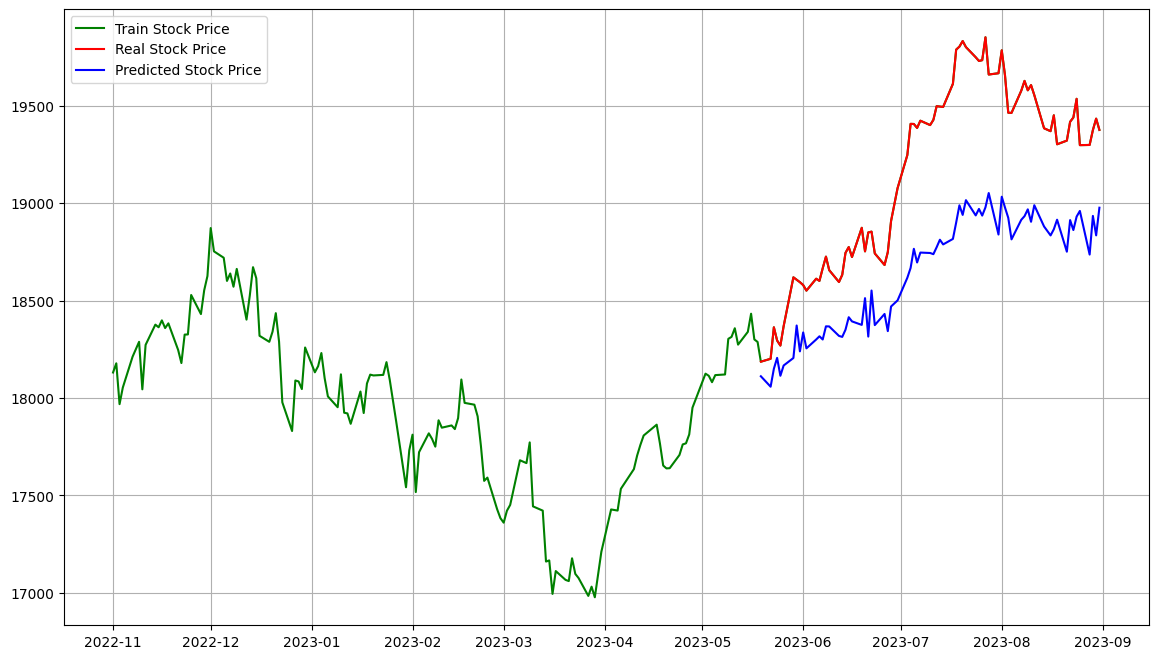

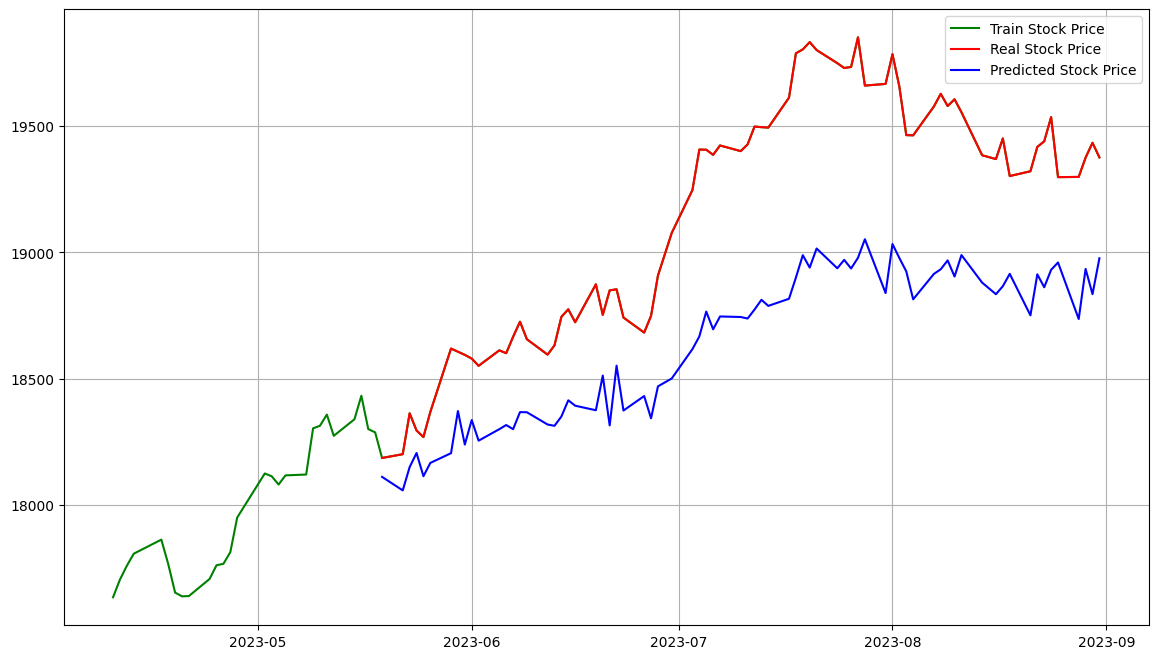

MSE: 307790.8582572594
MAE: 513.2277692177354
RMSE: 554.78902139215


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [ ]:
train_ma = train_data['Open']
test_ma = test_data['Open']

history = [x for x in train_ma]
y = test_ma
predictions = list()

model_fit = smt.ARIMA(history, order=(0,0,1)).fit()

yhat = model_fit.forecast()[0]

predictions.append(yhat)
history.append(y[0])

for i in range(1, len(y)):
    model_fit = smt.ARIMA(history, order=(0,0,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat+50)
    obs = y[i]
    history.append(obs)


plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()


print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

<Figure size 1850x1050 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

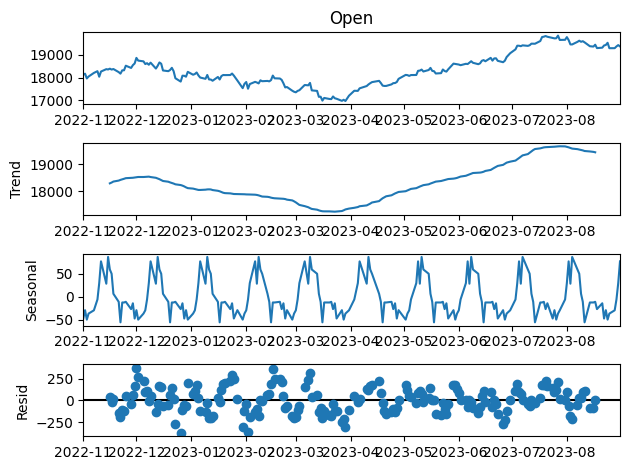

In [ ]:

data_arima = data['Open']
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
decomposition = seasonal_decompose(data_arima[-1000:], model='additive', period = 20)
plt.figure(figsize=(20,10))
fig = decomposition.plot()
plt.show()
     

In [ ]:

trend = decomposition.trend
sea=decomposition.seasonal



In [ ]:

train_trend, test_trend = trend[0:-73], trend[-73:]
train_sea, test_sea = sea[0:-73], sea[-73:]



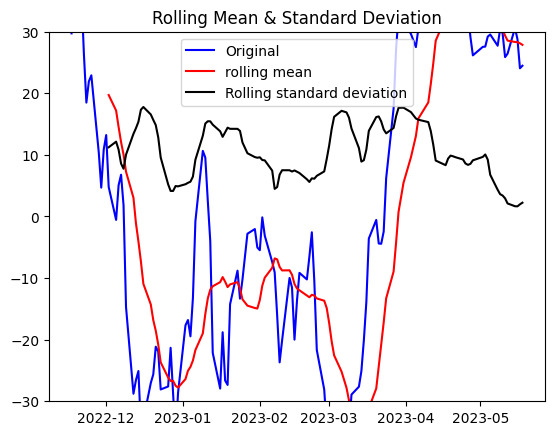

Results of Dickey-Fuller Test:
Test Statistic                  -1.618400
p-value                          0.473568
#Lags Used                       4.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    rolmean = pd.Series.rolling(timeseries,window=12).mean()
    rolstd = pd.Series.rolling(timeseries, window=12).std()
    fig = plt.figure()
    fig.add_subplot()
    orig = plt.plot(timeseries, color = 'blue',label='Original')
    mean = plt.plot(rolmean , color = 'red',label = 'rolling mean')
    std = plt.plot(rolstd, color = 'black', label= 'Rolling standard deviation')
    plt.ylim([-30,30])
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)
    
ts_log = train_trend
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
train_arima = train_trend.dropna()
test_arima = test_trend.dropna()


In [ ]:

history = [x for x in train_arima]
y = test_arima

predictions = list()

In [ ]:
len(history)

165

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


C:\Users\ayush\AppData\Local\Temp\ipykernel_16488\424480322.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0]+test_sea[0])
C:\Users\ayush\AppData\Local\Temp\ipykernel_16488\424480322.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predictions.append(yhat+test_sea[i])
C:\Users\ayush\AppData\Local\Temp\ipykernel_16488\424480322.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]
c:\Users\ayush\Ap

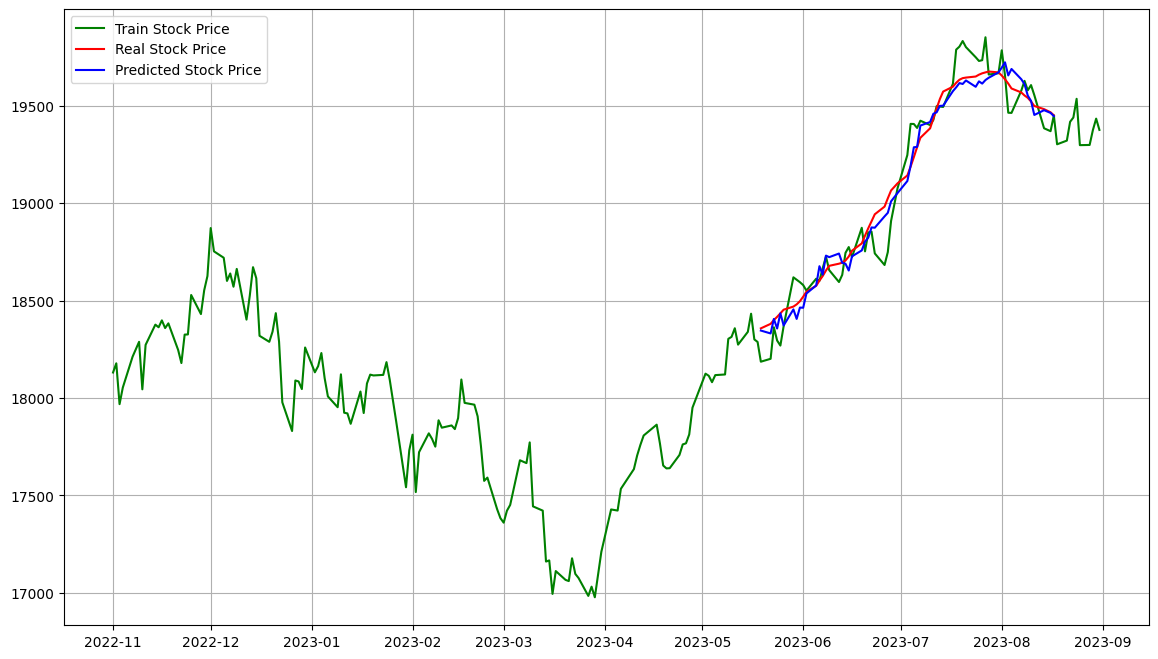

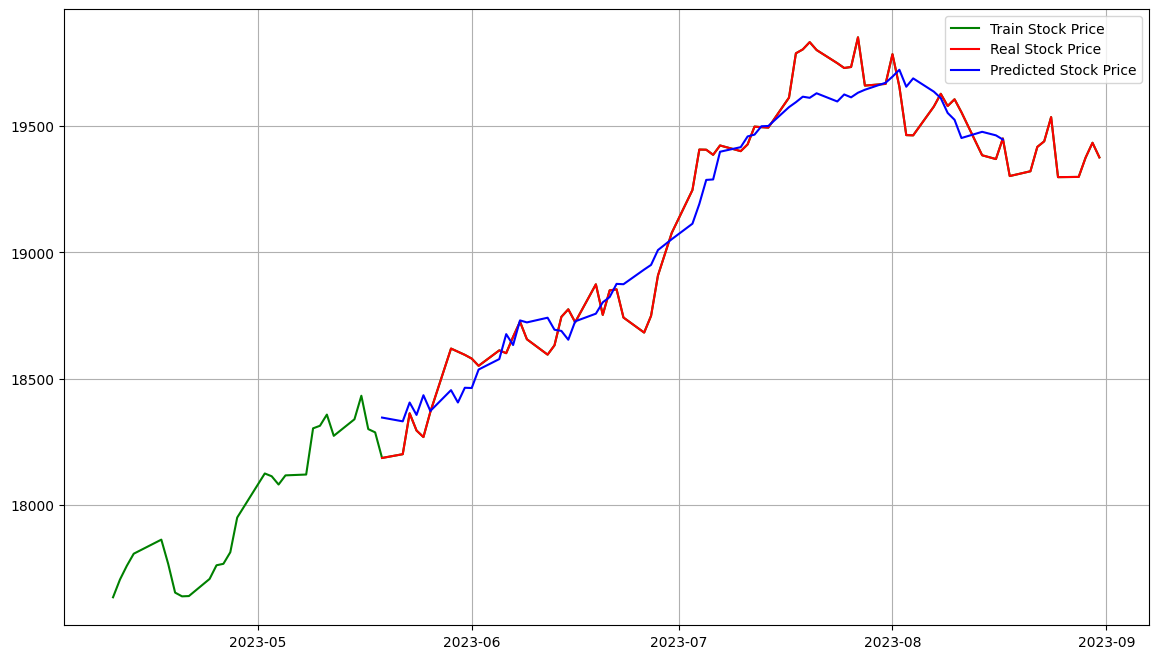

MSE: 2030.9034998557752
MAE: 37.02938609302619
RMSE: 45.06554670539097


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [ ]:


model_fit = smt.ARIMA(history, order=(1,0,1)).fit()

yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0]+test_sea[0])


for i in range(1, len(y)):
    model_fit =  smt.ARIMA(history, order=(1,0,1)).fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat+test_sea[i])
    obs = y[i]
    history.append(obs)

plt.figure(figsize=(14,8))
plt.plot(data.index, data['Open'], color='green', label = 'Train Stock Price')
plt.plot(y.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock Price')
plt.plot(data.index[-73:], data['Open'].tail(73), color = 'red', label = 'Real Stock Price')
plt.plot(y.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.legend()
plt.grid(True)

plt.show()
print('MSE: '+str(mean_squared_error(y, predictions)))
print('MAE: '+str(mean_absolute_error(y, predictions)))
print('RMSE: '+str(sqrt(mean_squared_error(y, predictions))))

In [ ]:
returns = pd.DataFrame(np.log(train_data['Open']).diff().dropna())
returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
returns_array_like = [x for l in returns.values for x in l]
_, pvalue, *_ = adfuller(returns_array_like)
print ('pvalue :',pvalue)


pvalue : 6.425421753700408e-23


In [ ]:
arma_mod01 = smt.ARIMA(returns, order=(1,0,2)).fit()
print (arma_mod01.summary())
print ('-------------------------------------')
print (arma_mod01.params)

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Log Return Rate   No. Observations:                  134
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 473.213
Date:                Tue, 17 Oct 2023   AIC                           -936.425
Time:                        22:51:02   BIC                           -921.936
Sample:                             0   HQIC                          -930.537
                                - 134                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.375e-05      0.001      0.085      0.932      -0.001       0.001
ar.L1         -0.9357      0.103     -9.118      0.000      -1.137      -0.735
ma.L1          0.8826      0.127      6.963      0.0

In [ ]:
from statsmodels.stats.stattools import jarque_bera
_, jbpv, *_ = jarque_bera(returns.values)
print ('pvalue-->',jbpv)
     

pvalue--> [0.19341598]


In [ ]:

from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean

In [ ]:

arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
print (res.summary())
print (' ')
print ('The estimated parameters: ')
print ('----------------------------------------')
print (res.params)
     

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.142e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                        Constant Mean - GARCH Model Results                         
Dep. Variable:              Log Return Rate   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -4950.35
Distribution:      Standardized Student's t   AIC:                           9910.71
Method:                  Maximum Likelihood   BIC:                           9925.19
                                              No. Observations:                  134
Date:                      Tue, Oct 17 2023   Df Residuals:                      133
Time:                              22:50:17   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
---------------------------------------------------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1894: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(table_val[pos], (np.float64, float)):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:1895: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[

In [ ]:
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]
print(mu, theta, omega, alpha, beta)

5.375094779747674e-05 -0.9356977113929685 2.6371506092163257e-06 0.9860665415228375 0.014647828773135864


C:\Users\ayush\AppData\Local\Temp\ipykernel_4000\2503081718.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = arma_mod01.params[0]
C:\Users\ayush\AppData\Local\Temp\ipykernel_4000\2503081718.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  theta = arma_mod01.params[1]
C:\Users\ayush\AppData\Local\Temp\ipykernel_4000\2503081718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  omega = res.params[1]
C:\Users\ayush\AppData\

In [ ]:

sigma_t = res.conditional_volatility.iloc[-1]
sigma_forecast = np.sqrt(omega + alpha * res.resid.iloc[-1] ** 2 + beta * res.conditional_volatility.iloc[-1] ** 2)
epsilon_t = sigma_t * np.random.standard_normal()
epsilon_forecast = sigma_forecast * np.random.standard_normal()
returns_forecast = mu + epsilon_forecast + theta * epsilon_t
returns_forecast

-8661.267324755428

In [ ]:

def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool

In [ ]:

train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

MSE: 46.131117535571626
MAE: 4.832848770312252
RMSE: 13.947057745737482


<Figure size 1400x800 with 0 Axes>

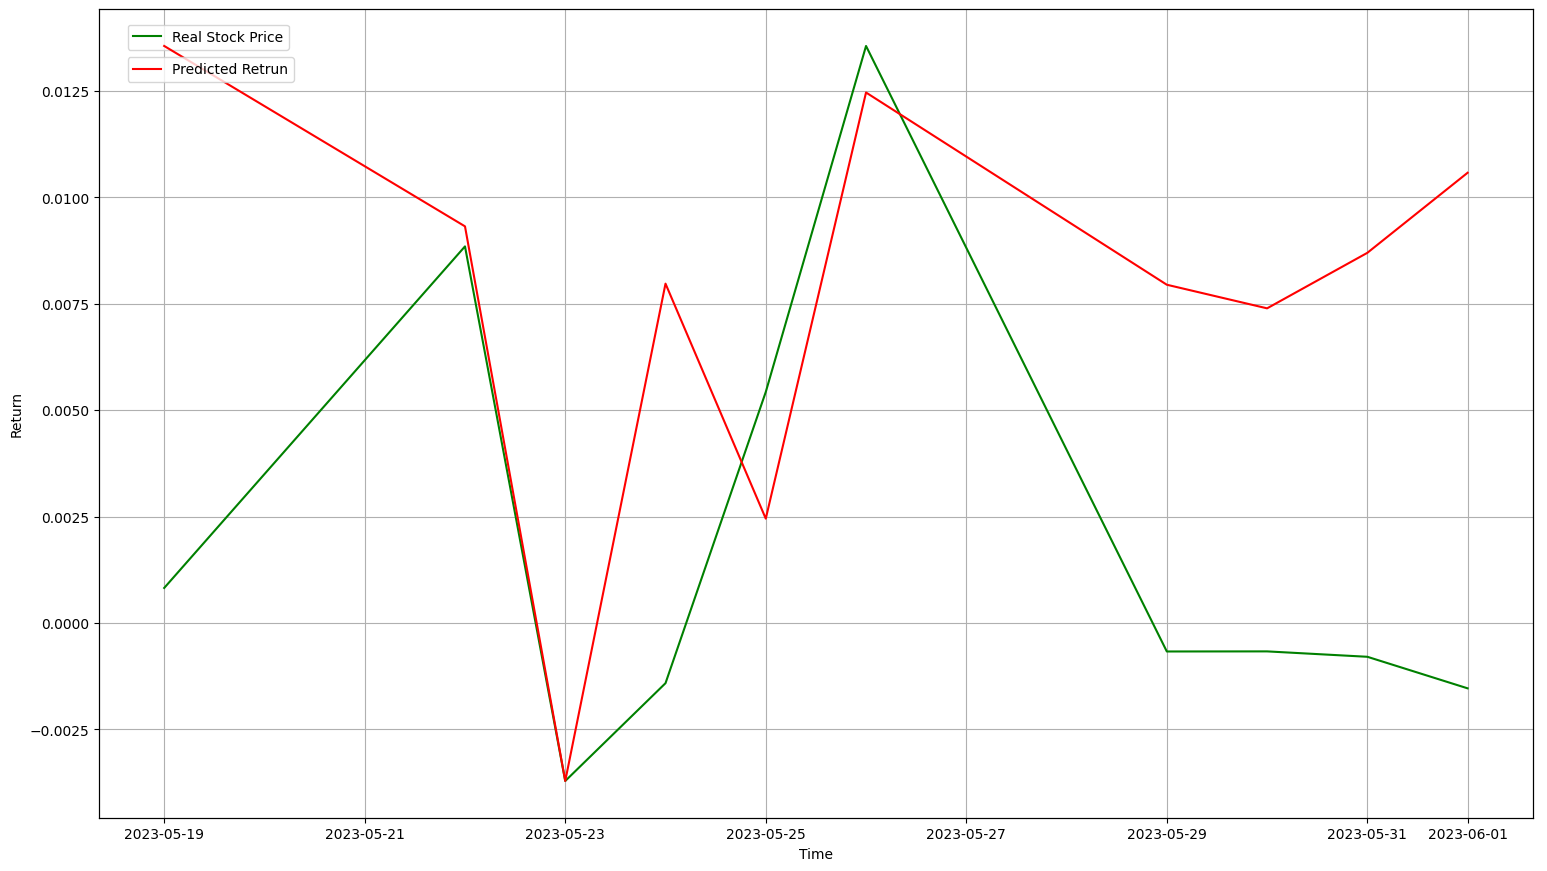

In [ ]:

plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')
ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")
ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))



print('MSE: '+str(mean_squared_error(train_returns['Log Return Rate'][:10], returns_predict(10))))
print('MAE: '+str(mean_absolute_error(train_returns['Log Return Rate'][:10], returns_predict(10))))
print('RMSE: '+str(sqrt(mean_squared_error(train_returns['Log Return Rate'][:10], returns_predict(10)))))





In [ ]:
print('MSE: '+str(mean_squared_error(train_returns['Log Return Rate'][:10], returns_predict(10))))
print('MAE: '+str(mean_absolute_error(train_returns['Log Return Rate'][:10], returns_predict(10))))
print('RMSE: '+str(sqrt(mean_squared_error(train_returns['Log Return Rate'][:10], returns_predict(10)))))



MSE: 115.60505984398897
MAE: 5.854542785426812
RMSE: 7.19649209726145


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [ ]:
returns


,Log Return Rate,sentiment_indexes
Date,,
2022-11-02,0.002600,-0.249391
2022-11-03,-0.011595,-0.133028
2022-11-04,0.004722,0.590887
2022-11-07,0.008733,0.516820
2022-11-09,0.004192,-0.465406
...,...,...
2023-05-12,-0.004589,0.672327
2023-05-15,0.003581,-0.640627
2023-05-16,0.005061,0.194782


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may a

MSE: 15.174112442536074
MAE: 4.094875725856145
RMSE: 4.38241862659878


<Figure size 1400x800 with 0 Axes>

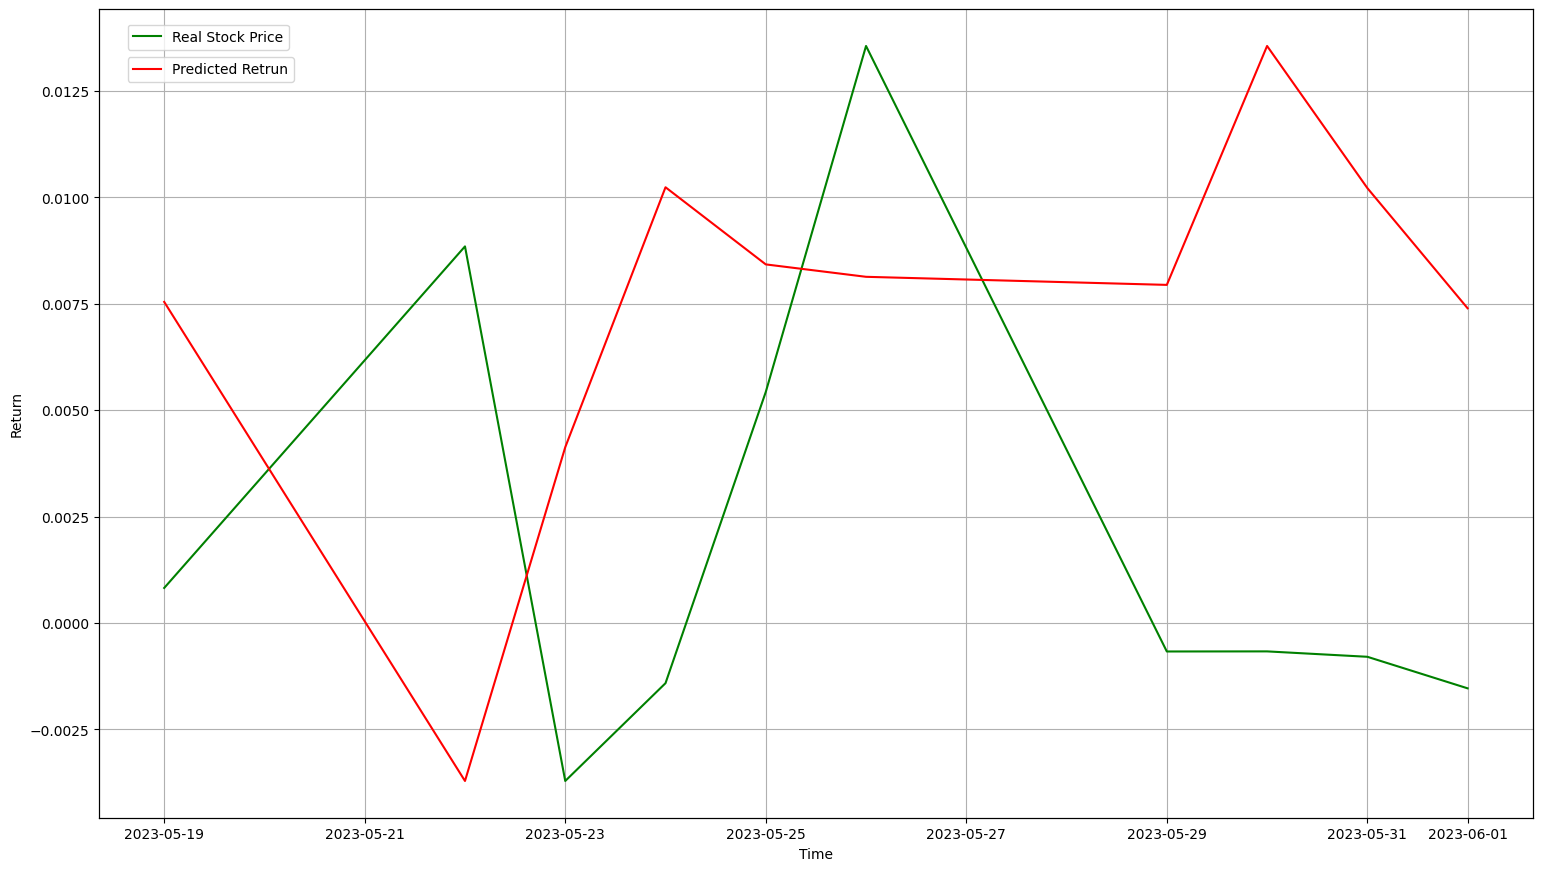

In [ ]:


# arma_mod01 = smt.ARIMA(returns, order=(1, 0)).fit()
arma_mod01 = smt.ARIMA(returns['Log Return Rate'], exog = returns['sentiment_indexes'], order=(1,0,2)).fit()

arch_mod = ConstantMean(returns['Log Return Rate'])
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()

res=arch_mod.fit(update_freq=5, disp='off')

mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]


def returns_predict(period):
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool


train_returns = pd.DataFrame(np.log(test_data['Open']).diff().dropna())
train_returns.rename(columns={'Open':'Log Return Rate'}, inplace=True)


plt.figure(figsize=(14,8))
fig = plt.figure()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(111)
ax.plot(data.index[-73:-63], train_returns['Log Return Rate'][:10], color='green', label = 'Real Stock Price')
ax2 = ax.twinx()
ax2.plot(data.index[-73:-63],returns_predict(10), color='red',label = 'Predicted Retrun')


ax.legend(loc = (0.02, 0.95))
ax.grid()
ax.set_xlabel("Time")
ax.set_ylabel("Return")


ax2.set_yticks([])
ax2.legend(loc = (0.02, 0.91))



print('MSE: '+str(mean_squared_error(train_returns['Log Return Rate'][:10], returns_predict(10))))
print('MAE: '+str(mean_absolute_error(train_returns['Log Return Rate'][:10], returns_predict(10))))
print('RMSE: '+str(sqrt(mean_squared_error(train_returns['Log Return Rate'][:10], returns_predict(10)))))

